In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
from scipy.interpolate import pchip_interpolate
from scipy import interpolate, signal

In [9]:
# Functions
#_______________________________________________________________________________
def Load_Files(dir):
    data={}
    entries = os.listdir(dir)
    titles= ['Sensor','TimeStamp','Roll','Pitch','Heading','xGyr','yGyr','zGyr','BatteryLVL']
    for i in entries:
        if 'SENSOR'in i:
            name= i.split('.')
            s = pd.read_csv(dir + i, sep=",")
            s.columns= titles
            s.loc[:,'TimeStamp']= s.loc[:,'TimeStamp']/1000
            data[name[0]] = s
    return data
#_______________________________________________________________________________
def Plot_Data(data):
  """
  This fuction plot the Roll, Pitch and Heading data.
  """

  fig, (ax1, ax2, ax3) = plt.subplots(3,figsize=(10,15))
  for i in data:
    s= data[i]
    ax1.plot(s.loc[:,'TimeStamp'],s.loc[:,'Roll'], label= i)
    ax2.plot(s.loc[:,'TimeStamp'],s.loc[:,'Pitch'], label= i)
    ax3.plot(s.loc[:,'TimeStamp'],s.loc[:,'Heading'], label= i)
  ax1.legend()
  ax1.set_xlabel('Time (s)')
  ax1.set_ylabel('Roll (°)')
  ax1.set_title('Roll')
  ax2.legend()
  ax2.set_xlabel('Time (s)')
  ax2.set_ylabel('Pitch (°)')
  ax2.set_title('Pitch')
  ax3.legend()
  ax3.set_xlabel('Time (s)')
  ax3.set_ylabel('Heading (°)')
  ax3.set_title('Heading')
  plt.show()
  return None
#_______________________________________________________________________________
def Set_Data(data):
  """
  This fuction set the sensors to start in 0.
  """
  for i in data:
    s= data[i]
    s= s.iloc[50:data[i].size-29,:]                                             #errase first 50 takes and last 29
    time= s.loc[:,"TimeStamp"]
    time= time-time.iloc[0]
    s.loc[:,'TimeStamp']= time
    data[i]= s
  return data 
#_______________________________________________________________________________
def Delete_Peaks(data,thresh=89):
  """
  This fuction fix the angles lokking for the abrupt changes.
  """
  for i in data: 
    old_data= data[i].iloc[:,2:5]
    new_data= old_data
    i_d= 1
    for c in range(0,len(old_data)-1):
      for cp in range(1,len(old_data.columns)-1):  
        dif= new_data.iloc[c,cp]-new_data.iloc[c,cp-1]
        if abs(dif)> thresh:
          if i_d == 1:
            i_d=0
            inc= cp
            chg=-new_data.iloc[c,cp]-new_data.iloc[c,cp-1]
          elif i_d == 0:
            new_data.iloc[c,inc:cp-1]=-old_data.iloc[c,inc:cp-1]-chg
            i_d=1
    data[i].iloc[:,2:5]= new_data
  return data
#_______________________________________________________________________________
def Resample(data, f):
  """
  This fuction resample the data to a frecuency passed by the user.
  """
  for i in data:
    s= data[i]
    n_t= s.loc[:,'TimeStamp']
    n_t= n_t-n_t.iloc[0]
    n_t= np.linspace(0,n_t.iloc[-1], round(n_t.iloc[-1]*f))
    r= s.loc[:,'Roll']
    p= s.loc[:,'Pitch']
    h= s.loc[:,'Heading']
    x= s.loc[:,'xGyr']
    y= s.loc[:,'yGyr']
    z= s.loc[:,'zGyr']
    r= pchip_interpolate(s.loc[:,'TimeStamp'],r,n_t)
    p= pchip_interpolate(s.loc[:,'TimeStamp'],p,n_t)
    h= pchip_interpolate(s.loc[:,'TimeStamp'],h,n_t)
    x= pchip_interpolate(s.loc[:,'TimeStamp'],x,n_t)
    y= pchip_interpolate(s.loc[:,'TimeStamp'],y,n_t)
    z= pchip_interpolate(s.loc[:,'TimeStamp'],z,n_t)
    s= pd.DataFrame({'TimeStamp':n_t, 'Roll':r, 'Pitch':p, 'Heading':h, 'xGyr':x, 'yGyr':y, 'zGyr':z})
    data[i]= s
  return data

C:\Users\Jose Amorocho\AppData\Local\Temp\ipykernel_86272\2465464763.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  s.loc[:,'TimeStamp']= time


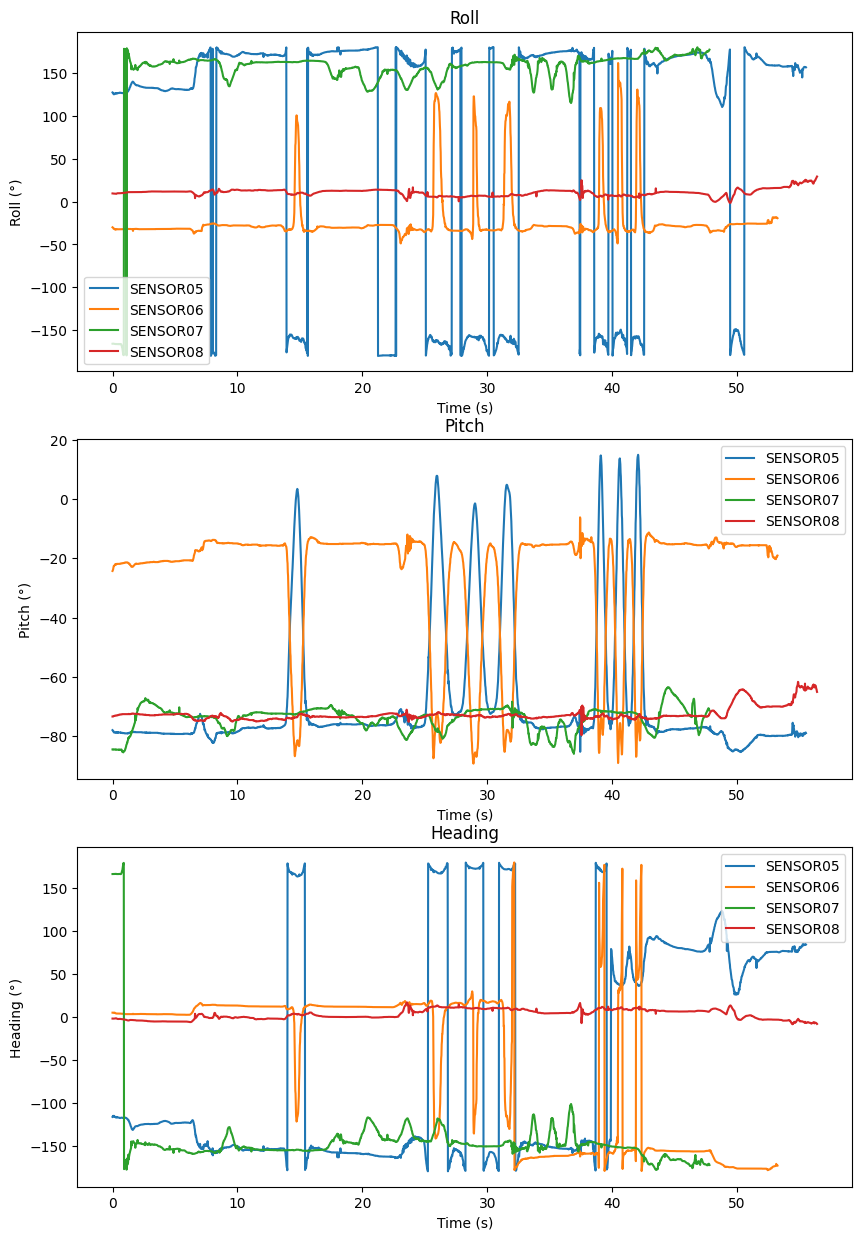

In [47]:
#test= input('put the name test:')
test= 'FERod_p1'
dir="D:/_Proyecto-SAM/2022-02-01/"+test+'/'

# Load the data
data= Load_Files(dir)
# Set Start to 0 Sensors(SAM).
data= Set_Data(data)
# Fix Angles
data= Delete_Peaks(data,150)
Plot_Data(data)

In [ ]:


# Oversample the function.
data= Resample(data,200)